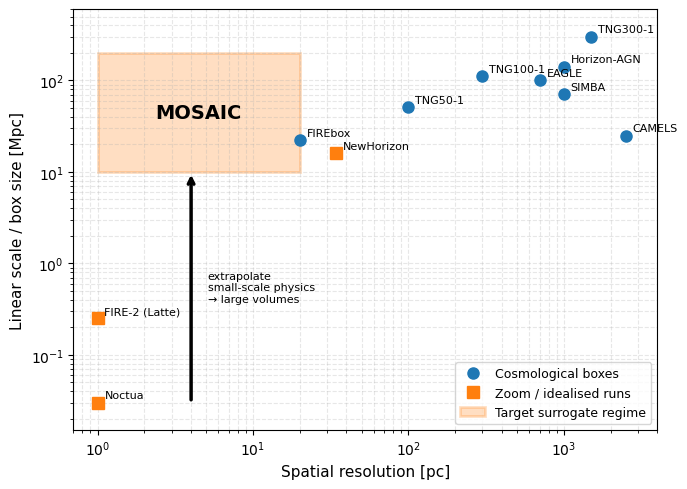

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# ============================================================
# Simulation catalogue
# Units:
#   - resolution in pc (spatial resolution / typical cell size / softening)
#   - size in Mpc (box side or effective linear scale for zooms)
#
# Values marked as APPROXIMATE should be refined from the original papers
# before using in a publication.
# ============================================================

simulations = {
    # ---------- Uniform cosmological boxes ----------
    "TNG50-1": {
        # Median star-forming gas resolution ~70–140 pc; adopt 100 pc.
        "resolution_pc": 100.0,
        "size_mpc": 51.7,
        "kind": "box",
    },
    "TNG100-1": {
        # Stellar softening ~0.7 kpc; SF gas a few ×10^2 pc → adopt 300 pc (APPROX).
        "resolution_pc": 300.0,   # APPROXIMATE
        "size_mpc": 110.7,
        "kind": "box",
    },
    "TNG300-1": {
        # Stellar/DM softening ~1.48 kpc → adopt 1.5 kpc (APPROX).
        "resolution_pc": 1500.0,  # APPROXIMATE
        "size_mpc": 302.6,
        "kind": "box",
    },
    "EAGLE": {
        # Max physical softening ~0.7 pkpc.
        "resolution_pc": 700.0,
        "size_mpc": 100.0,
        "kind": "box",
    },
    "SIMBA": {
        # Box 50 h^-1 Mpc; for h~0.7 → ~71 Mpc.
        # Spatial resolution quoted as kpc-scale; adopt 1 kpc (APPROX).
        "resolution_pc": 1000.0,  # APPROXIMATE
        "size_mpc": 71.0,         # APPROXIMATE (depends on h)
        "kind": "box",
    },
    "Horizon-AGN": {
        # Box 100 h^-1 Mpc → ~142 Mpc; resolution ~1 kpc for galaxy structure (order-of-mag).
        "resolution_pc": 1000.0,  # APPROXIMATE
        "size_mpc": 142.0,        # APPROXIMATE (depends on h)
        "kind": "box",
    },
    "FIREbox": {
        # FIREbox: L ≈ 22.1 cMpc; baryonic resolution ~20 pc.
        "resolution_pc": 20.0,
        "size_mpc": 22.1,
        "kind": "box",
    },

    "CAMELS": {
        # FIREbox: L ≈ 22.1 cMpc; baryonic resolution ~20 pc.
        "resolution_pc": 2500,
        "size_mpc": 25,
        "kind": "box",
    },

    # ---------- High-res zooms / idealised regions ----------
    "NewHorizon": {
        # High-res region ~16 Mpc side; max refinement ~34 pc.
        "resolution_pc": 34.0,
        "size_mpc": 16.0,
        "kind": "zoom",
    },
    "FIRE-2 (Latte)": {
        # Gas resolution ~0.5–1 pc; adopt 1 pc.
        # Effective scale: MW halo R_vir ~250 kpc → 0.25 Mpc (APPROX).
        "resolution_pc": 1.0,
        "size_mpc": 0.25,   # APPROXIMATE effective size
        "kind": "zoom",
    },
    "Noctua": {
        # Gas resolution ~1 pc (sub-pc).
        # Effective scale: dwarf halo / disc radius; adopt 30 kpc → 0.03 Mpc (APPROX).
        "resolution_pc": 1.0,
        "size_mpc": 0.03,   # APPROXIMATE effective size
        "kind": "zoom",
    },
}

# ============================================================
# Surrogate regime shading
# Target: Noctua/FIRE-like resolution, but much larger volumes.
# Adjust based on what you actually aim to achieve.
# ============================================================

surrogate_region = {
    "min_resolution_pc": 1.0,    # match zoom-level resolution
    "max_resolution_pc": 20.0,   # allow modest relaxation
    "min_size_mpc": 10.0,        # much larger than zooms
    "max_size_mpc": 200.0,       # up to Euclid-like sub-volumes
}

# ============================================================
# Prepare arrays for plotting
# ============================================================

box_names, zoom_names = [], []
box_res, box_size = [], []
zoom_res, zoom_size = [], []

for name, vals in simulations.items():
    res = vals["resolution_pc"]
    L   = vals["size_mpc"]
    if vals["kind"] == "box":
        box_names.append(name)
        box_res.append(res)
        box_size.append(L)
    else:
        zoom_names.append(name)
        zoom_res.append(res)
        zoom_size.append(L)

box_res   = np.array(box_res, dtype=float)
box_size  = np.array(box_size, dtype=float)
zoom_res  = np.array(zoom_res, dtype=float)
zoom_size = np.array(zoom_size, dtype=float)

# ============================================================
# Make log–log plot
# ============================================================

fig, ax = plt.subplots(figsize=(7, 5))

# Cosmological boxes
ax.loglog(
    box_res,
    box_size,
    "o",
    markersize=8,
    label="Cosmological boxes",
)

# Zoom / idealised runs
ax.loglog(
    zoom_res,
    zoom_size,
    "s",
    markersize=8,
    label="Zoom / idealised runs",
)

# Annotate points
for x, y, label in zip(box_res, box_size, box_names):
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(5, 3),
        ha="left",
        fontsize=8,
    )

for x, y, label in zip(zoom_res, zoom_size, zoom_names):
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(5, 3),
        ha="left",
        fontsize=8,
    )

# ============================================================
# Add surrogate shaded region
# ============================================================

sr = surrogate_region
rect = Rectangle(
    (sr["min_resolution_pc"], sr["min_size_mpc"]),
    sr["max_resolution_pc"] - sr["min_resolution_pc"],
    sr["max_size_mpc"]      - sr["min_size_mpc"],
    facecolor="tab:orange",
    alpha=0.25,
    edgecolor="tab:orange",
    lw=2,
    label="Target surrogate regime",
)
ax.add_patch(rect)

# ============================================================
# Add "MOSAIC" label inside the target region
# (place it near the geometric centre in log space)
# ============================================================

x_center = 10 ** (0.5 * (np.log10(sr["min_resolution_pc"]) + np.log10(sr["max_resolution_pc"])))
y_center = 10 ** (0.5 * (np.log10(sr["min_size_mpc"])      + np.log10(sr["max_size_mpc"])))

ax.text(
    x_center, y_center,
    "MOSAIC",
    ha="center", va="center",
    fontsize=14, fontweight="bold"
)

# ============================================================
# Vertical arrow: Noctua -> target regime (same resolution, larger volume)
# ============================================================

noctua_x = simulations["Noctua"]["resolution_pc"]+3
noctua_y = simulations["Noctua"]["size_mpc"]

# point inside the target region at same x (use bottom edge of the region)
target_x = np.clip(noctua_x, sr["min_resolution_pc"], sr["max_resolution_pc"])
target_y = sr["min_size_mpc"]  # bottom of shaded region (i.e. "large scale" entry point)

ax.annotate(
    "",  # no text here (we add a separate label below)
    xy=(target_x, target_y),
    xytext=(noctua_x, noctua_y),
    arrowprops=dict(arrowstyle="->", lw=2.5)
)

# Label next to the arrow (offset in points so it stays readable on log axes)
ax.annotate(
    "extrapolate\nsmall-scale physics\n→ large volumes",
    xy=(target_x, np.sqrt(noctua_y * target_y)),  # mid in log space
    xytext=(12, 0),
    textcoords="offset points",
    ha="left", va="center",
    fontsize=8
)


# ============================================================
# Cosmetics
# ============================================================

ax.set_xlabel("Spatial resolution [pc]", fontsize=11)
ax.set_ylabel("Linear scale / box size [Mpc]", fontsize=11)

all_res  = np.concatenate([box_res, zoom_res])
all_size = np.concatenate([box_size, zoom_size])

ax.set_xlim(all_res.min() * 0.7, all_res.max() * 1.6)
ax.set_ylim(all_size.min() * 0.5, all_size.max() * 2.0)

ax.grid(True, which="both", ls="--", alpha=0.3)
ax.legend(loc="lower right", fontsize=9)

fig.tight_layout()
plt.savefig("/Users/marchuertascompany/Documents/admin/2025_AEI/sims.png")
plt.show()
